In [1]:
import scanpy as sc

In [2]:
experiment = None
# G:\dataset\04-PDAC\output\result\embedding
# input_dir = 'G:/dataset/06-CoronalMouseBrain/output/result/embedding/'
# input_dir = 'G:/dataset/05-LICA/output/result/embedding/'
# input_dir = 'G:/dataset/2_saggital/output/result/embedding/all/'
input_dir = 'G:/dataset/09-Mouse olfactory bulb/output/35um/result/embedding/'

methods = ['seurat', 'harmony', 'liger', 'PRECAST', 'STAGATE', 'STAligner', 'DeepST', 'GraphST', 'SPIRAL']
k_list = [13]

In [3]:
method = 'seurat'
k = k_list[0]
if experiment == None:
    adata = sc.read(input_dir + method + '_K' + str(k) + '_result.h5ad')
else:
    adata = sc.read(input_dir + experiment + '_' + method + '_K' + str(k) + '_result.h5ad')
adata

AnnData object with n_obs × n_vars = 28528 × 5330
    obs: 'orig.ident', 'celltype', 'batch', 'x', 'y', 'leiden', 'leiden_seurat', 'louvain', 'louvain_seurat', 'mclust_seurat', 'silhouette_temp'
    uns: 'ARI_celltype', 'ARI_leiden_seurat', 'ARI_louvain_seurat', 'ARI_mclust_seurat', 'IsolatedLabelsAsw_celltypeseurat', 'IsolatedLabelsAsw_leiden_seurat', 'IsolatedLabelsAsw_louvain_seurat', 'IsolatedLabelsAsw_mclust_seurat', 'NMI_celltype', 'NMI_leiden_seurat', 'NMI_louvain_seurat', 'NMI_mclust_seurat', 'PCRseurat', 'cASW_celltypeseurat', 'cASW_leiden_seurat', 'cASW_louvain_seurat', 'cASW_mclust_seurat', 'cLISI_celltypeseurat', 'cLISI_leiden_seurat', 'cLISI_louvain_seurat', 'cLISI_mclust_seurat', 'gearysC_seurat', 'graph_connectivity_celltypeseurat', 'graph_connectivity_leiden_seurat', 'graph_connectivity_louvain_seurat', 'graph_connectivity_mclust_seurat', 'iASW_celltypeseurat', 'iASW_leiden_seurat', 'iASW_louvain_seurat', 'iASW_mclust_seurat', 'iLISI_celltypeseurat', 'kBET_celltypeseura

In [4]:
value_counts = adata.obs['batch'].value_counts()
adata.obs['batch'].unique()

['10X', 'SlideV2', 'BGI']
Categories (3, object): ['10X', 'BGI', 'SlideV2']

In [5]:
value_counts = adata.obs['batch'].value_counts()
value_counts

SlideV2    18537
BGI         8806
10X         1185
Name: batch, dtype: int64

In [6]:
adata.obsm['spatial'][-value_counts[0]:,].shape

(3353, 2)

In [20]:
value_counts[1]

3942

In [40]:
method = 'seurat'
input_dir = 'G:/dataset/09-Mouse olfactory bulb/output/35um/result/embedding/'
adata = sc.read(input_dir + method + '_K' + str(k) + '_result.h5ad')
print(adata)
print(adata.obs['batch'].value_counts())

AnnData object with n_obs × n_vars = 28528 × 5330
    obs: 'orig.ident', 'celltype', 'batch', 'x', 'y', 'leiden', 'leiden_seurat', 'louvain', 'louvain_seurat', 'mclust_seurat', 'silhouette_temp'
    uns: 'ARI_celltype', 'ARI_leiden_seurat', 'ARI_louvain_seurat', 'ARI_mclust_seurat', 'IsolatedLabelsAsw_celltypeseurat', 'IsolatedLabelsAsw_leiden_seurat', 'IsolatedLabelsAsw_louvain_seurat', 'IsolatedLabelsAsw_mclust_seurat', 'NMI_celltype', 'NMI_leiden_seurat', 'NMI_louvain_seurat', 'NMI_mclust_seurat', 'PCRseurat', 'cASW_celltypeseurat', 'cASW_leiden_seurat', 'cASW_louvain_seurat', 'cASW_mclust_seurat', 'cLISI_celltypeseurat', 'cLISI_leiden_seurat', 'cLISI_louvain_seurat', 'cLISI_mclust_seurat', 'gearysC_seurat', 'graph_connectivity_celltypeseurat', 'graph_connectivity_leiden_seurat', 'graph_connectivity_louvain_seurat', 'graph_connectivity_mclust_seurat', 'iASW_celltypeseurat', 'iASW_leiden_seurat', 'iASW_louvain_seurat', 'iASW_mclust_seurat', 'iLISI_celltypeseurat', 'kBET_celltypeseura

In [41]:
adata.obsm['spatial'][:value_counts[2],][:,0] = adata.obsm['spatial'][:value_counts[2],][:,0] + 4000
adata.obsm['spatial'][:value_counts[2],][:,1] = adata.obsm['spatial'][:value_counts[2],][:,1] - 3000

adata.obsm['spatial'][-value_counts[1]:,][:,0] = adata.obsm['spatial'][-value_counts[1]:,][:,0] * 50
adata.obsm['spatial'][-value_counts[1]:,][:,1] = adata.obsm['spatial'][-value_counts[1]:,][:,1] * 50

adata.obsm['spatial'][value_counts[2]:(value_counts[2]+value_counts[0]),][:,0] = adata.obsm['spatial'][value_counts[2]:(value_counts[2]+value_counts[0]):,][:,0]  - 7000


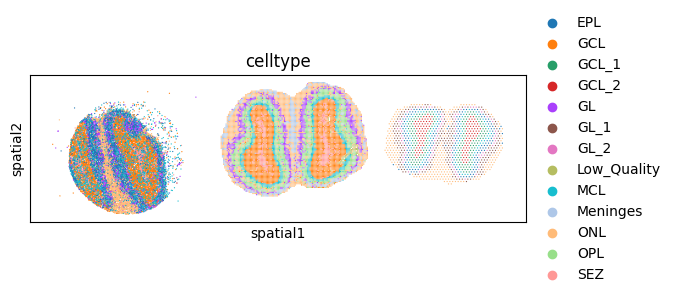

In [44]:
sc.pl.spatial(adata, color='celltype',spot_size =50)

In [ ]:
method = methods[0]
k = k_list[1]
adata = sc.read(input_dir + experiment + '_' + method + '_K' + str(k) + '_result.h5ad')
adata.obsm['spatial'][2696:,][:,0] = adata.obsm['spatial'][2696:,][:,0] + 7800
adata.obsm['spatial'][2696:,][:,1] = adata.obsm['spatial'][2696:,][:,1] + 400
sc.pl.spatial(adata, color=['celltype', 'leiden_'+method, 'louvain_'+method, 'mclust_'+method],spot_size =100)

In [ ]:
#  Saggital      sample1  [2696:][:,0] + 7800  [2696:,][:,1] + 400       sample2 [2825:,][:,0] + 8400   [2825:,][:,1] - 820
# adata.obsm['spatial'][value_counts[3]:(value_counts[3]+value_counts[2]),][:,1] = adata.obsm['spatial'][value_counts[3]:(value_counts[3]+value_counts[2]),][:,1] + 10000
# adata.obsm['spatial'][(value_counts[3]+value_counts[2]):(value_counts[3]+value_counts[2]+value_counts[0]),][:,0] = adata.obsm['spatial'][(value_counts[3]+value_counts[2]):(value_counts[3]+value_counts[2]+value_counts[0]),][:,0] + 7800
# adata.obsm['spatial'][(value_counts[3]+value_counts[2]):(value_counts[3]+value_counts[2]+value_counts[0]),][:,1] = adata.obsm['spatial'][(value_counts[3]+value_counts[2]):(value_counts[3]+value_counts[2]+value_counts[0]),][:,1] + 400
# adata.obsm['spatial'][-value_counts[1]:,][:,0] = adata.obsm['spatial'][-value_counts[1]:,][:,0] + 8500
# adata.obsm['spatial'][-value_counts[1]:,][:,1] = adata.obsm['spatial'][-value_counts[1]:,][:,1] + 9000
### Saggital all  SPIRAL
# adata.obsm['spatial'][-value_counts[2]:,][:,1] = adata.obsm['spatial'][-value_counts[2]:,][:,1] + 10000  # anterior2
# adata.obsm['spatial'][:value_counts[0],][:,0] = adata.obsm['spatial'][:value_counts[0],][:,0] + 7800   #posterior1
# adata.obsm['spatial'][:value_counts[0],][:,1] = adata.obsm['spatial'][:value_counts[0],][:,1] + 400    #posterior1
# adata.obsm['spatial'][value_counts[0]:(value_counts[0]+value_counts[1]),][:,0] = adata.obsm['spatial'][value_counts[0]:(value_counts[0]+value_counts[1]):,][:,0] + 8500    #posterior2
# adata.obsm['spatial'][value_counts[0]:(value_counts[0]+value_counts[1]),][:,1] = adata.obsm['spatial'][value_counts[0]:(value_counts[0]+value_counts[1]):,][:,1] + 9000    #posterior2

#  BRCA          adata.obsm['spatial'][value_counts[0]:,][:,0] + 80
#  PDAC          adata.obsm['spatial'][value_counts[0]:,][:,0] + 20      adata.obsm['spatial'][value_counts[0]:,][:,1] + 10
#### Coronal
# adata.obsm['spatial'][:value_counts[0],][:,0] = adata.obsm['spatial'][:value_counts[0],][:,0] - 13000
# adata.obsm['spatial'][:value_counts[0],][:,1] = adata.obsm['spatial'][:value_counts[0],][:,1] + 3000
# adata.obsm['spatial'][(value_counts[0] + value_counts[2]):,][:,0] = adata.obsm['spatial'][(value_counts[0] + value_counts[2]):,][:,0] * 2
# adata.obsm['spatial'][(value_counts[0] + value_counts[2]):,][:,1] = adata.obsm['spatial'][(value_counts[0] + value_counts[2]):,][:,1] * 2
# adata.obsm['spatial'][(value_counts[0] + value_counts[2]):,][:,0] = adata.obsm['spatial'][(value_counts[0] + value_counts[2]):,][:,0] + 17000
# adata.obsm['spatial'][(value_counts[0] + value_counts[2]):,][:,1] = adata.obsm['spatial'][(value_counts[0] + value_counts[2]):,][:,1] + 4000

# LICA
adata.obsm['spatial'][value_counts[3]:(value_counts[3]+value_counts[1]),][:,0] = adata.obsm['spatial'][value_counts[3]:(value_counts[3]+value_counts[1]),][:,0] + 13000

adata.obsm['spatial'][(value_counts[3]+value_counts[1]):(value_counts[3]+value_counts[2]+value_counts[1]),][:,0] = adata.obsm['spatial'][(value_counts[3]+value_counts[1]):(value_counts[3]+value_counts[2]+value_counts[1]),][:,0] + 14000
adata.obsm['spatial'][(value_counts[3]+value_counts[1]):(value_counts[3]+value_counts[2]+value_counts[1]),][:,1] = adata.obsm['spatial'][(value_counts[3]+value_counts[1]):(value_counts[3]+value_counts[2]+value_counts[1]),][:,1] + 13000

adata.obsm['spatial'][-value_counts[0]:,][:,1] = adata.obsm['spatial'][-value_counts[0]:,][:,1] + 13000


# MouseOB 35

adata.obsm['spatial'][:value_counts[2],][:,0] = adata.obsm['spatial'][:value_counts[2],][:,0] + 4000
adata.obsm['spatial'][:value_counts[2],][:,1] = adata.obsm['spatial'][:value_counts[2],][:,1] - 3000

adata.obsm['spatial'][-value_counts[1]:,][:,0] = adata.obsm['spatial'][-value_counts[1]:,][:,0] * 50
adata.obsm['spatial'][-value_counts[1]:,][:,1] = adata.obsm['spatial'][-value_counts[1]:,][:,1] * 50

adata.obsm['spatial'][value_counts[2]:(value_counts[2]+value_counts[0]),][:,0] = adata.obsm['spatial'][value_counts[2]:(value_counts[2]+value_counts[0]):,][:,0]  - 7000


D:\anaconda\envs\index\lib\site-packages\scanpy\plotting\_utils.py:429: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
D:\anaconda\envs\index\lib\site-packages\scanpy\plotting\_utils.py:429: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
D:\anaconda\envs\index\lib\site-packages\scanpy\plotting\_utils.py:429: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
D:\anaconda\envs\index\lib\site-packages\scanpy\plotting\_utils.py:429: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
D:\anaconda\envs\index\lib\site-packages\scanpy\plotting\_utils.py:429: ImplicitModification

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'G:\dataset\09-Mouse olfactory bulb\output\35um\result\embedding\SPIRAL_pyg_K13_result.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

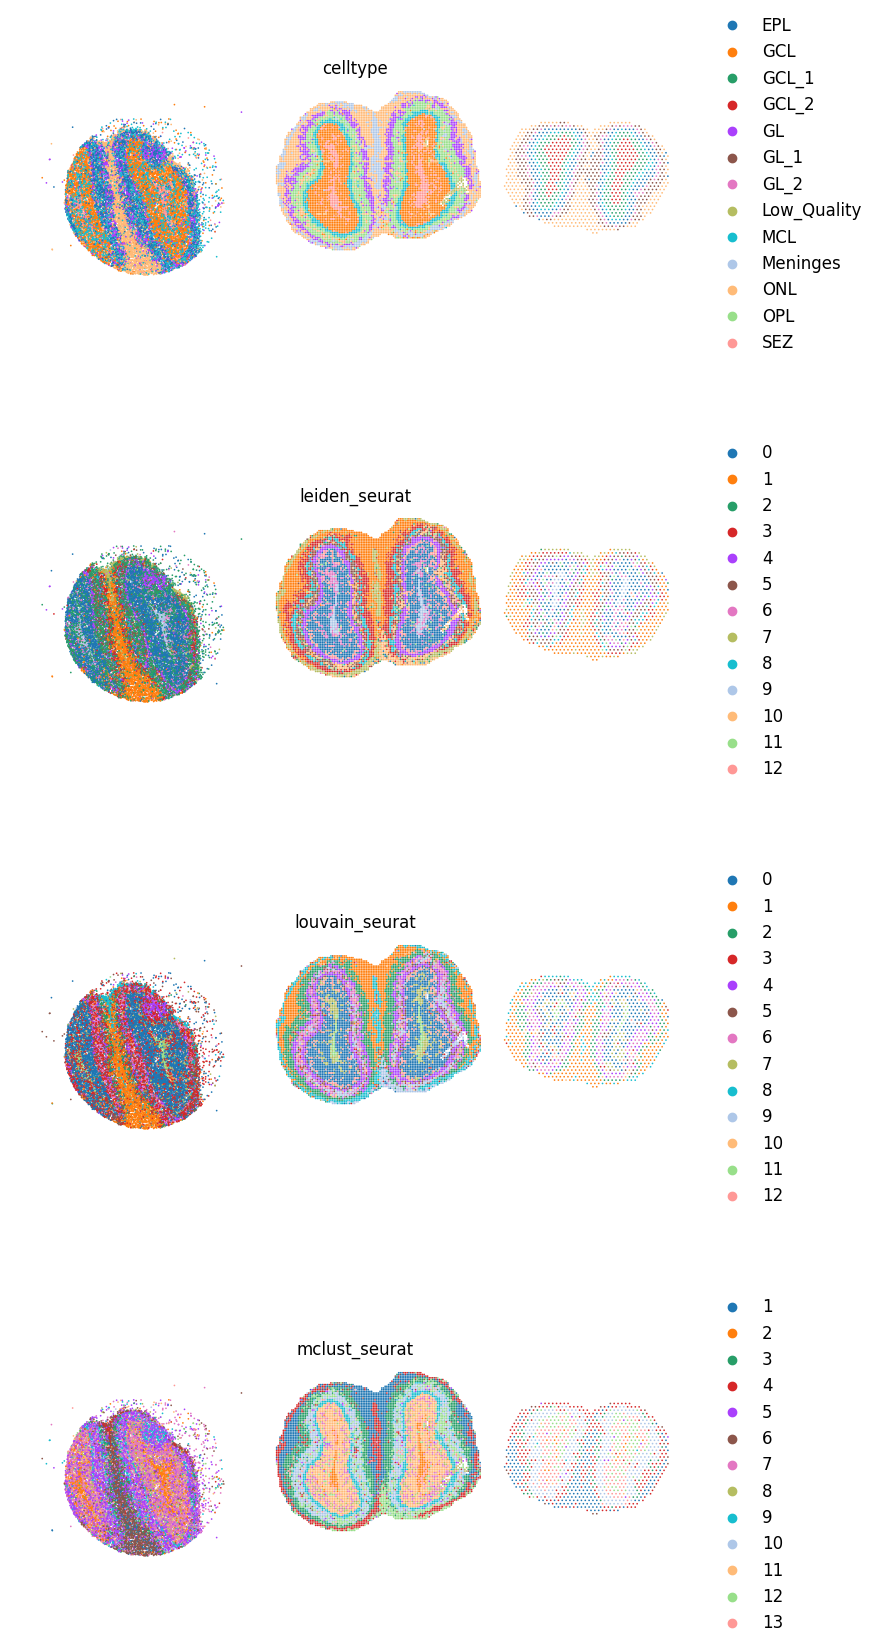

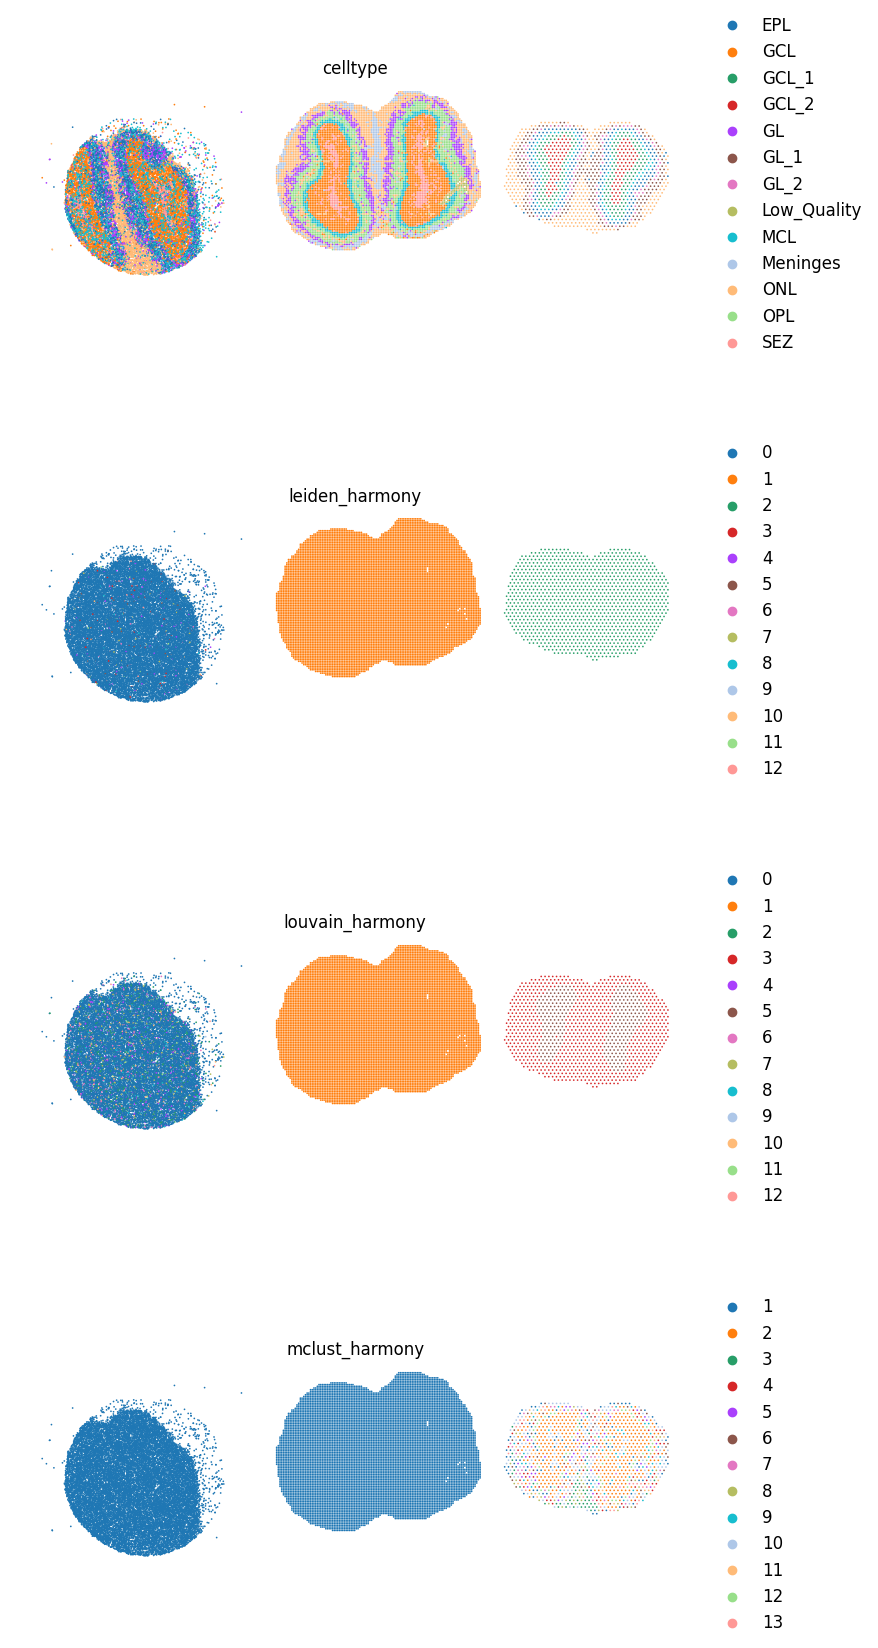

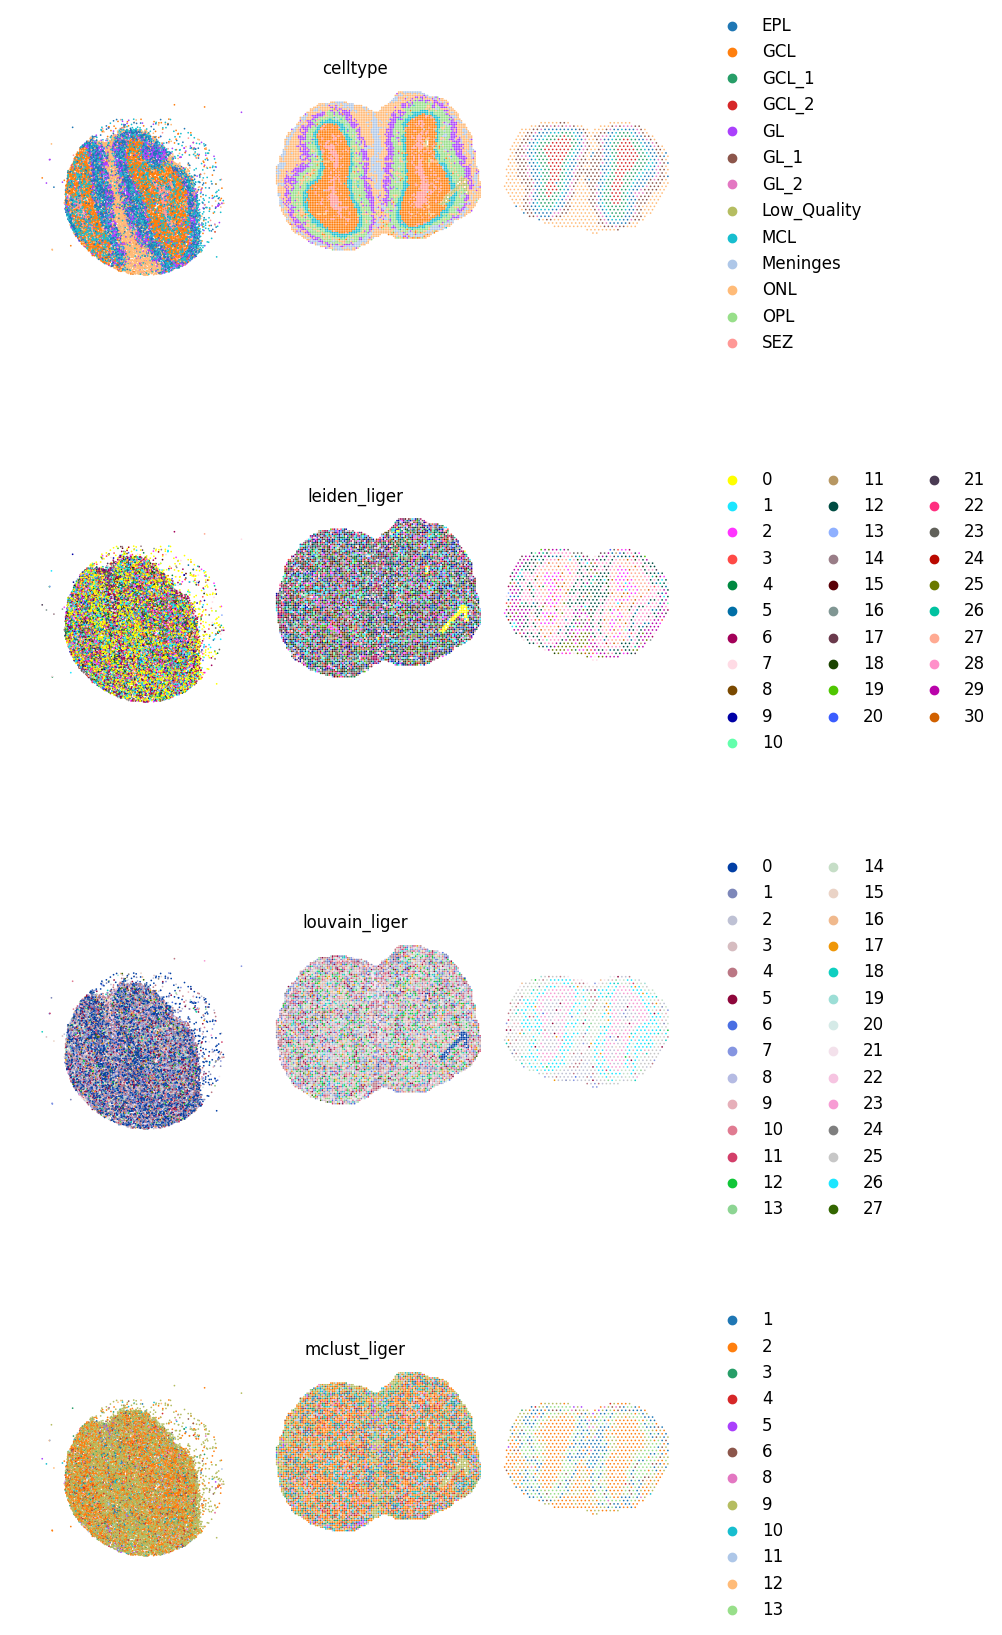

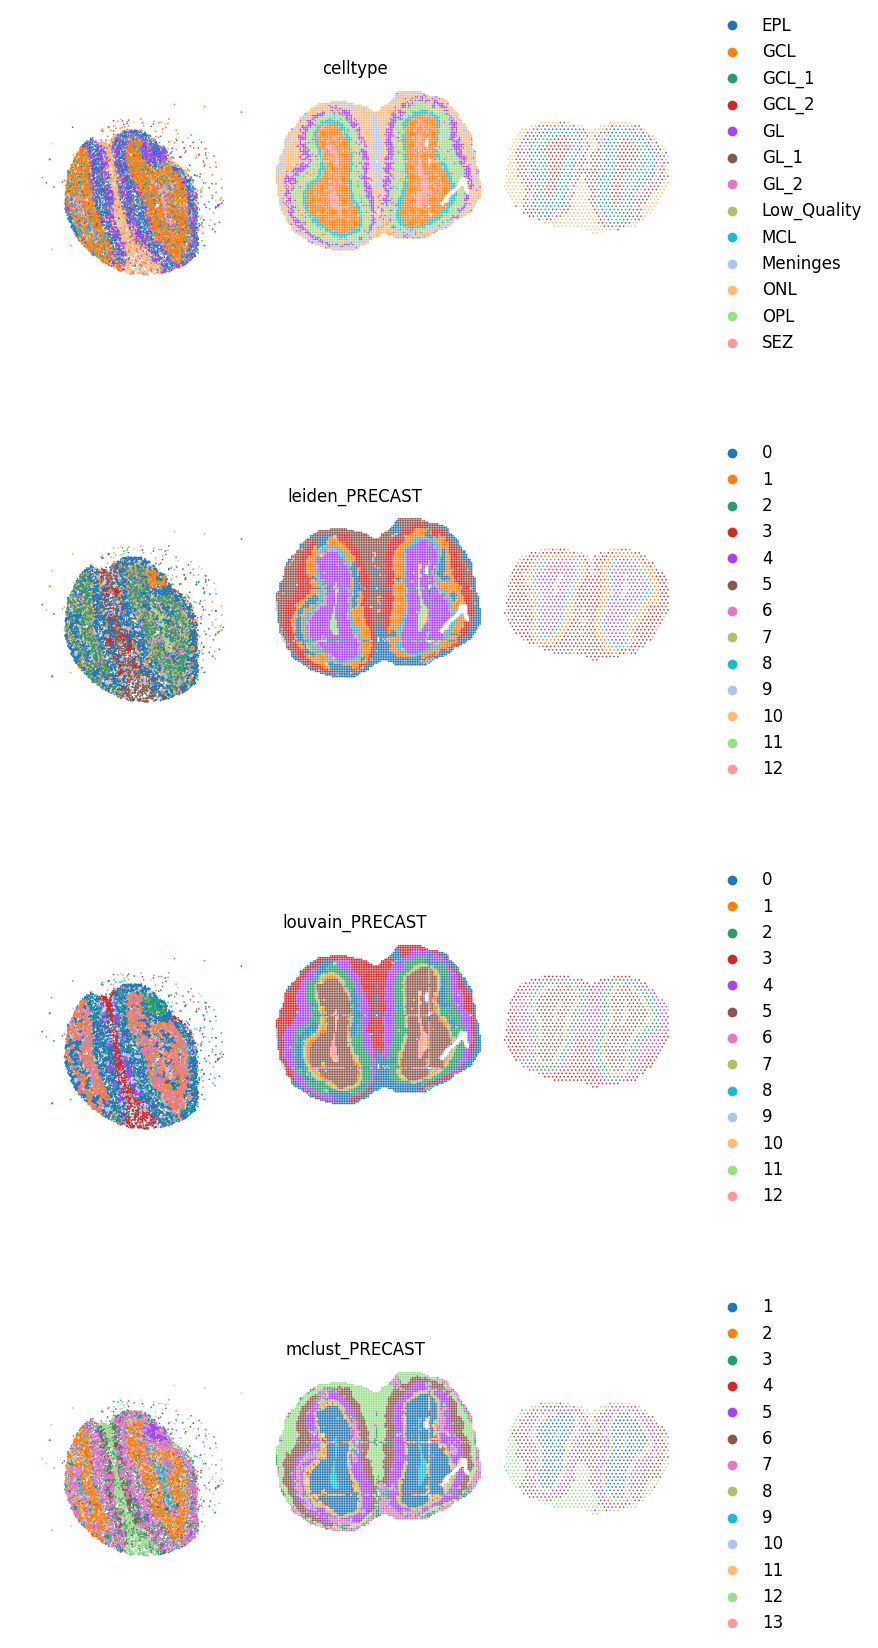

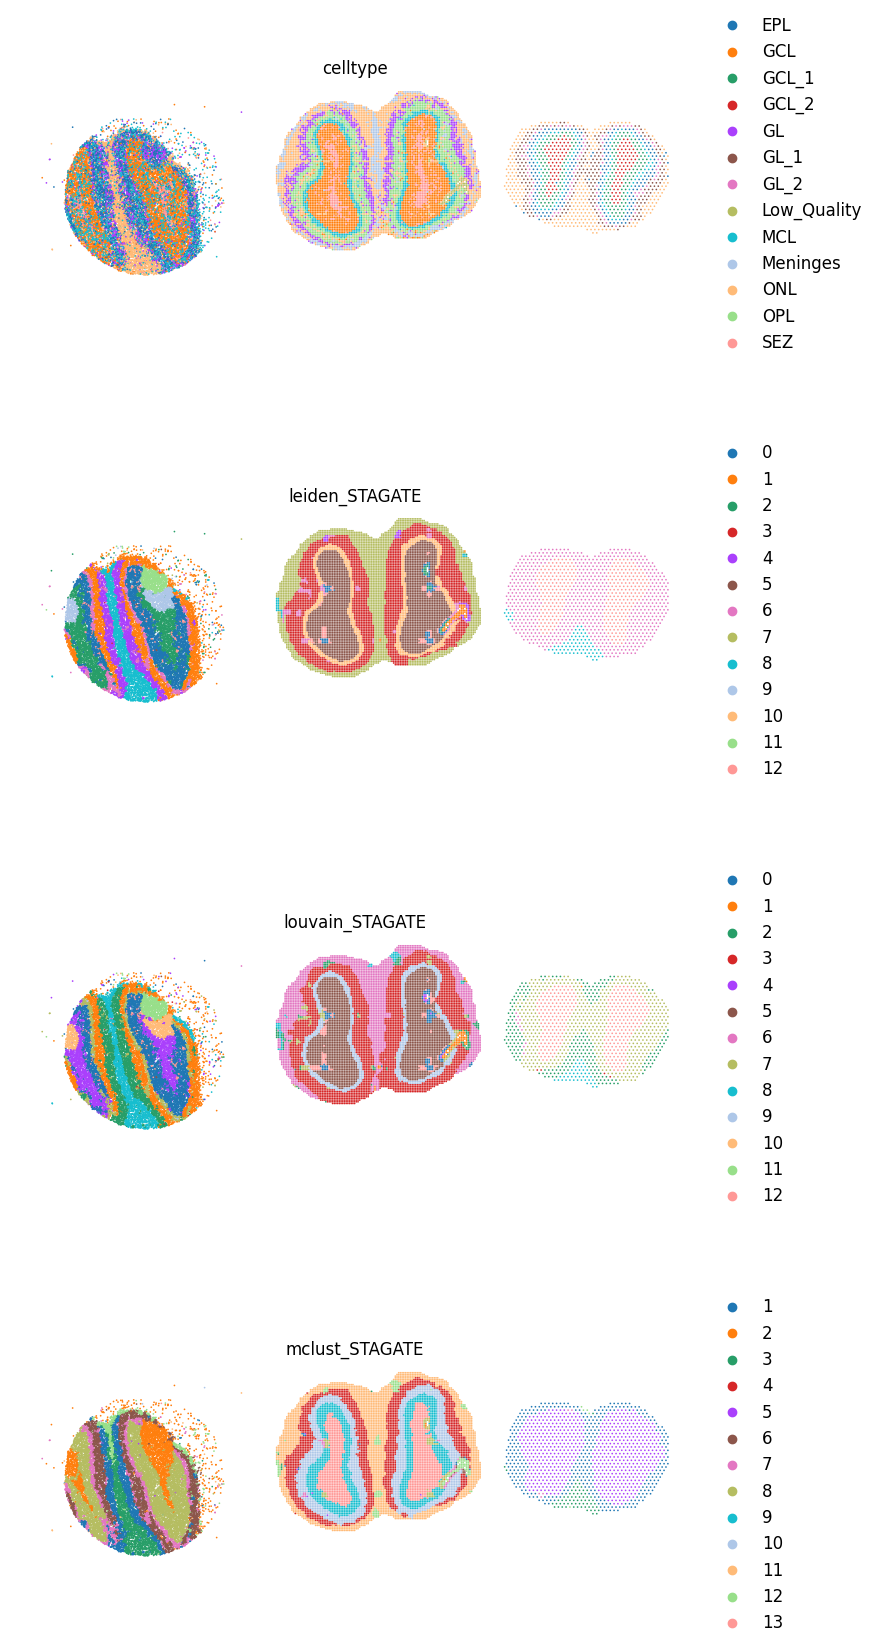

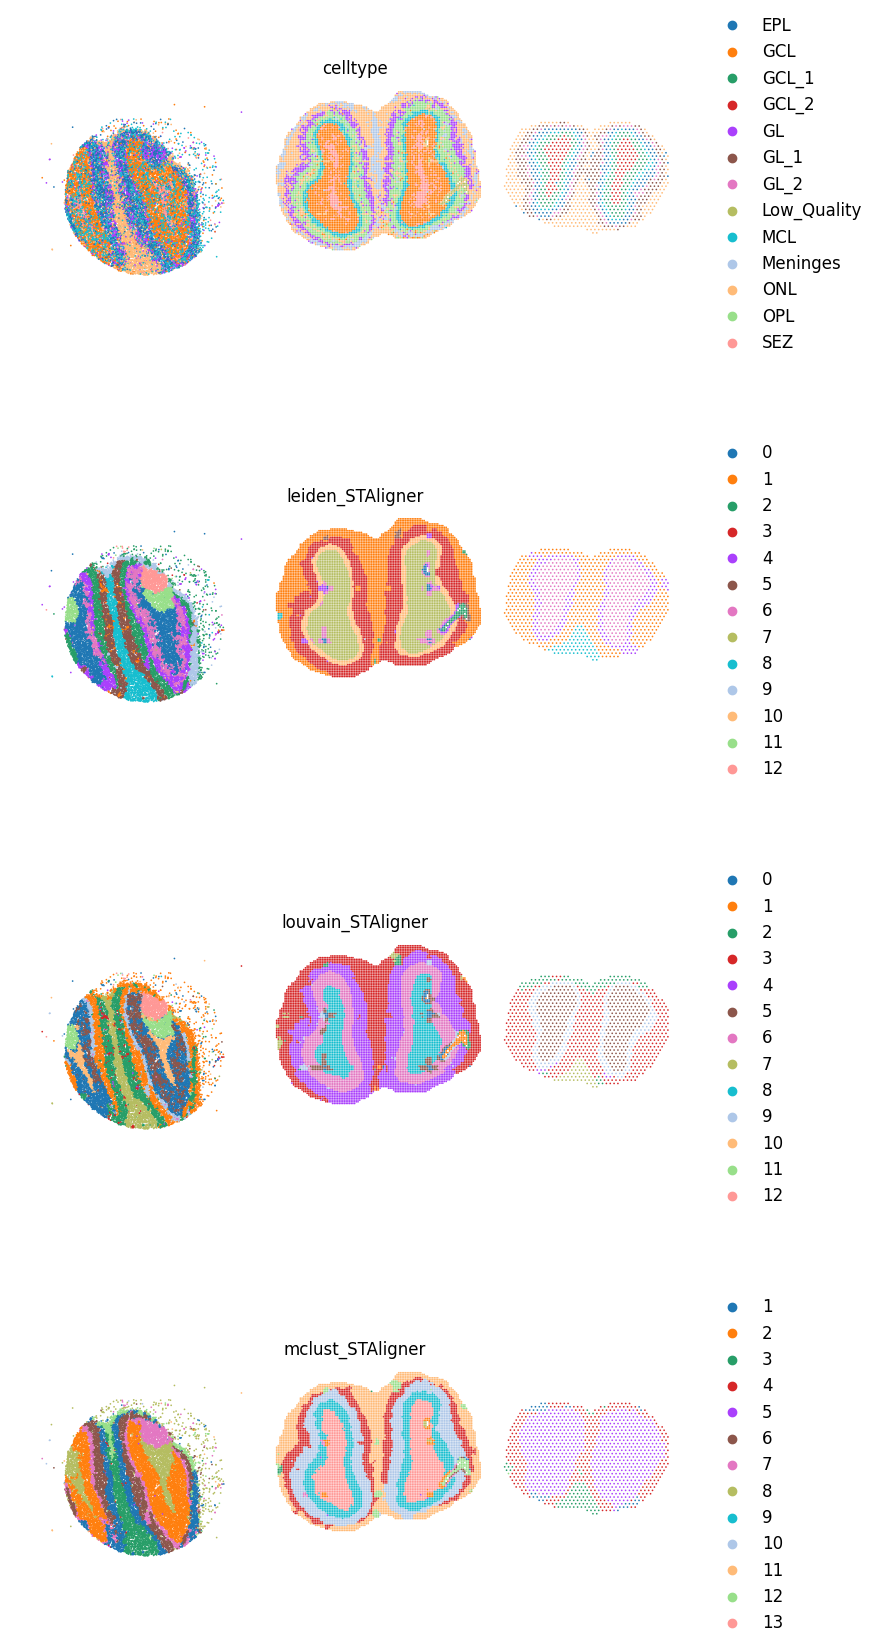

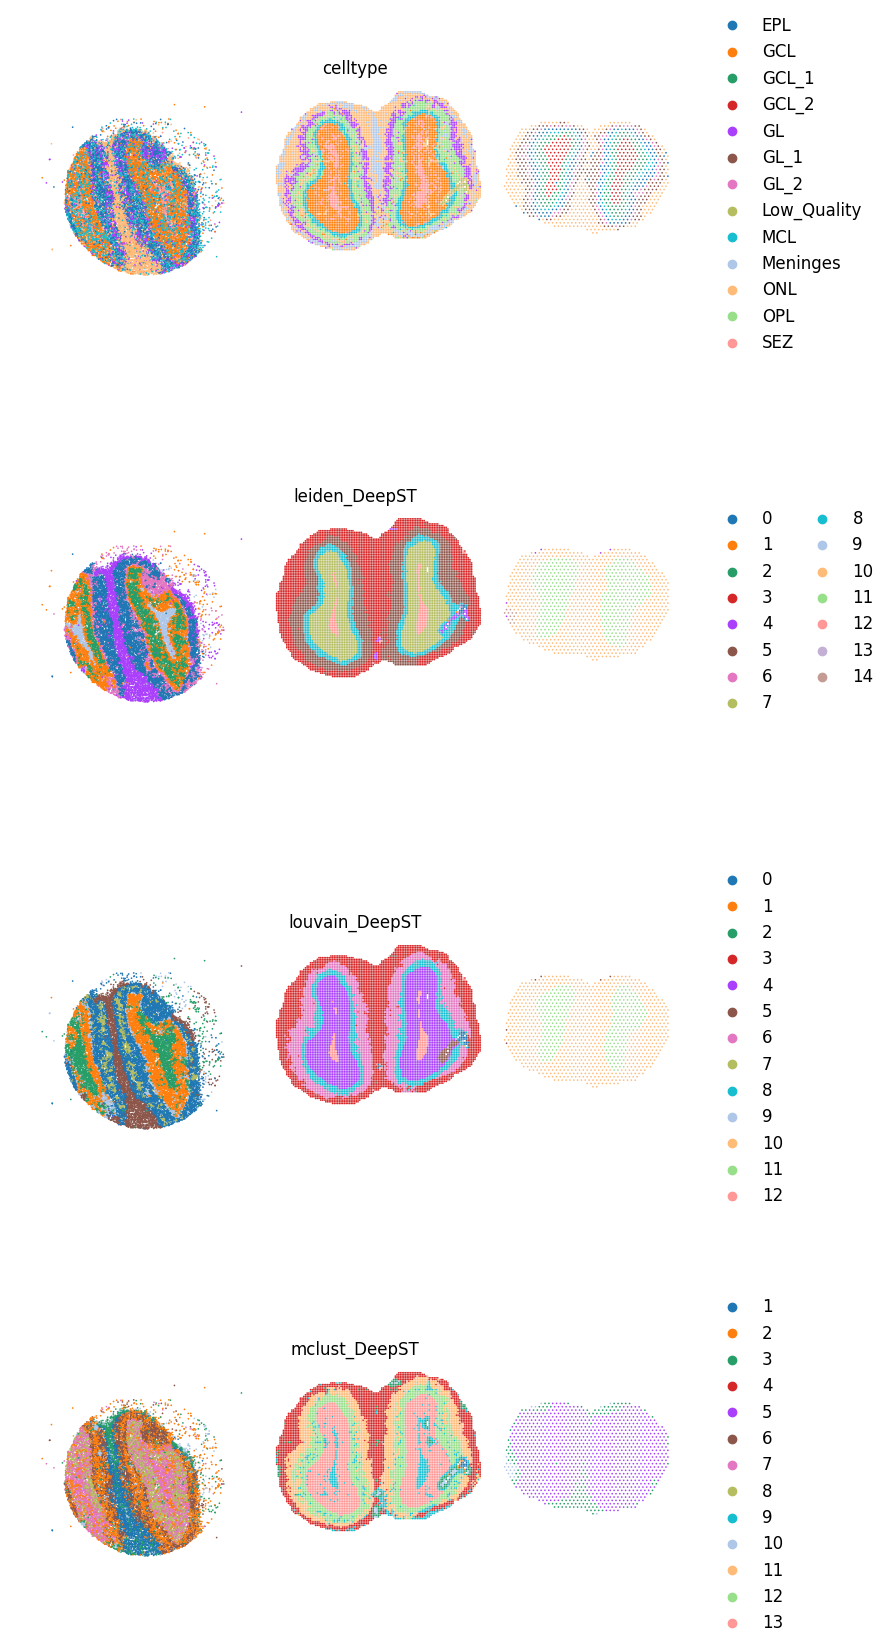

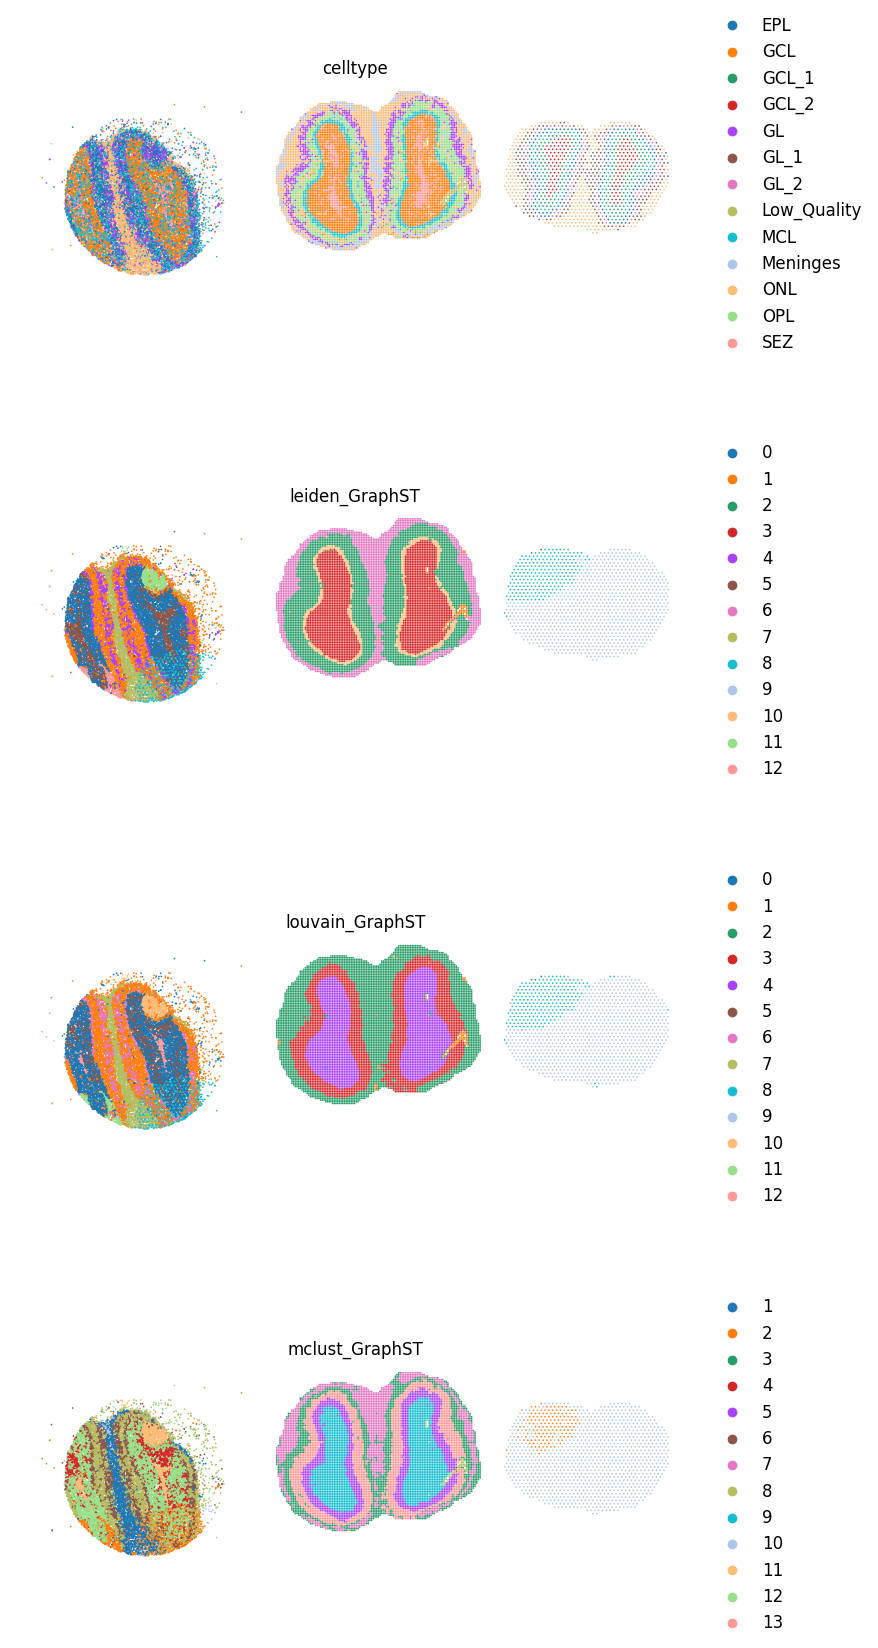

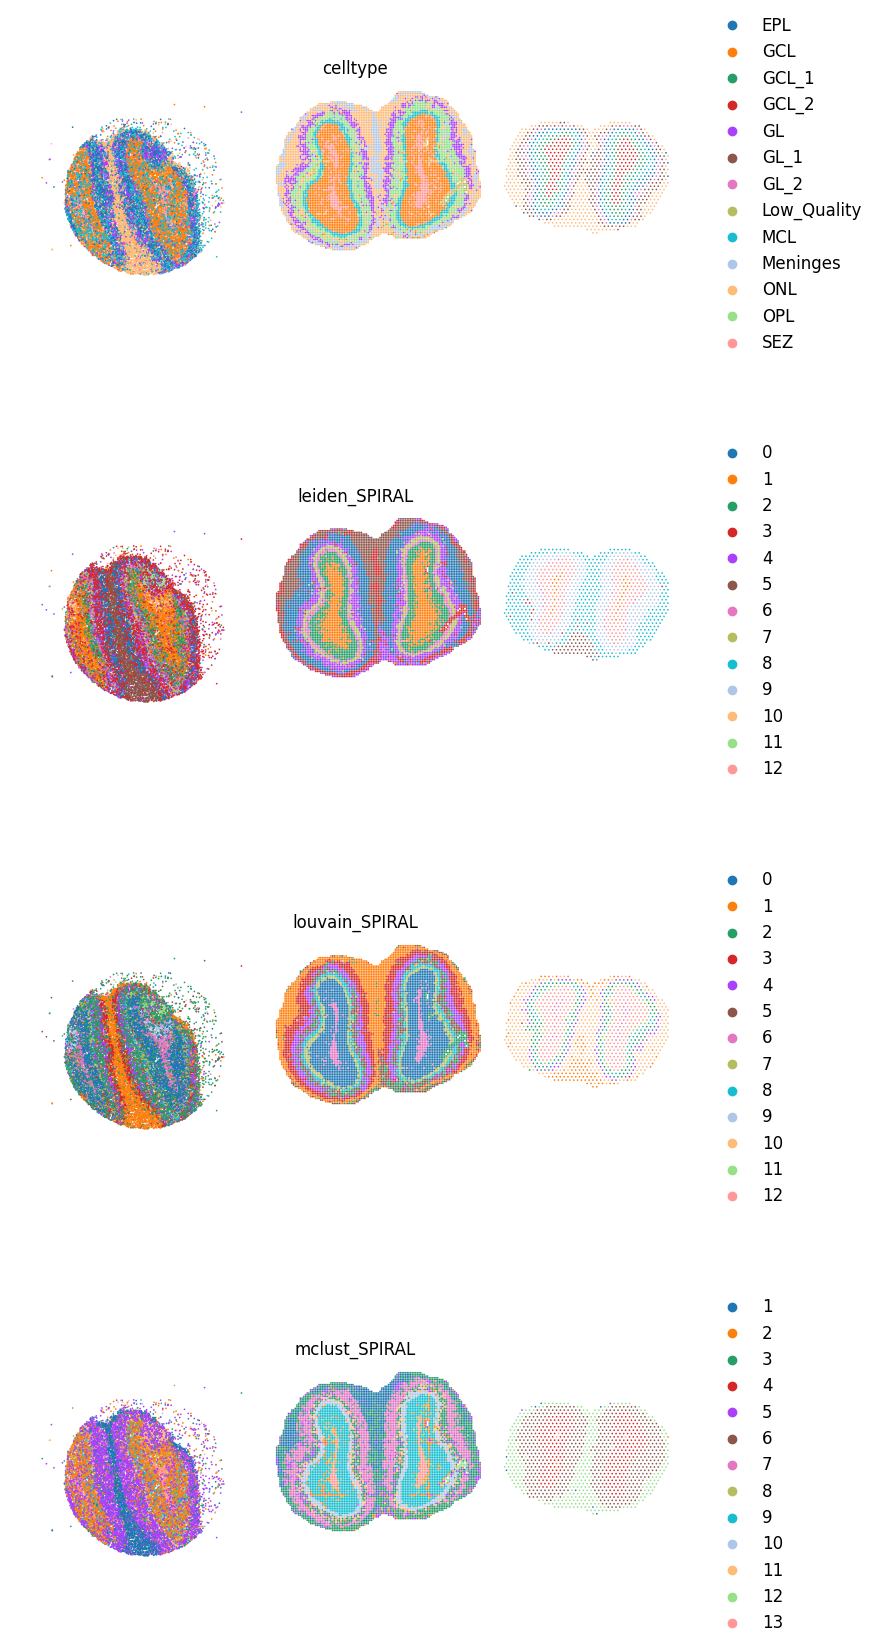

In [45]:
import scanpy as sc
import matplotlib.pyplot as plt
experiment = None
input_path = 'G:/dataset/09-Mouse olfactory bulb/output/35um/result/embedding/'
methods = ['seurat', 'harmony', 'liger', 'PRECAST', 'STAGATE', 'STAligner', 'DeepST', 'GraphST', 'SPIRAL', 'SPIRAL_pyg']
# methods = ['GraphST']
k_list = [13]
annotation = 'celltype'

output_dir = 'G:/dataset/09-Mouse olfactory bulb/output/35um/result/cluster_pic/'

for method in methods:
    input_dir = input_path
    for k in k_list:
        if experiment == None:
            adata = sc.read(input_dir + method + '_K' + str(k) + '_result.h5ad')
        else:
            adata = sc.read(input_dir + experiment + '_' + method + '_K' + str(k) + '_result.h5ad')
        value_counts = adata.obs['batch'].value_counts()
        
        adata.obsm['spatial'][:value_counts[2],][:,0] = adata.obsm['spatial'][:value_counts[2],][:,0] + 4000
        adata.obsm['spatial'][:value_counts[2],][:,1] = adata.obsm['spatial'][:value_counts[2],][:,1] - 3000

        adata.obsm['spatial'][-value_counts[1]:,][:,0] = adata.obsm['spatial'][-value_counts[1]:,][:,0] * 50
        adata.obsm['spatial'][-value_counts[1]:,][:,1] = adata.obsm['spatial'][-value_counts[1]:,][:,1] * 50

        adata.obsm['spatial'][value_counts[2]:(value_counts[2]+value_counts[0]),][:,0] = adata.obsm['spatial'][value_counts[2]:(value_counts[2]+value_counts[0]):,][:,0]  - 7000

        

        adata  = adata[adata.obs[annotation] != '']
        adata  = adata[adata.obs[annotation] != 'na']
        adata  = adata[adata.obs[annotation] != 'NA']
        adata  = adata[adata.obs[annotation] != 'unknown']
        sc.pl.spatial(adata, color=[annotation,'leiden_'+method, 'louvain_'+method, 'mclust_'+method], ncols=1,
                      wspace=0.5, show=False, legend_fontsize=12, legend_fontoutline=2, frameon=False, 
                      img_key='hires', spot_size=50)
        plt.savefig(output_dir + method + '_K' + str(k) + '.png', dpi=300)
#         break
#     break